In [1]:
import nsepy
import datetime
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [3]:
def gethdata(stockname):
    today=datetime.date.today()
    duration=300
    duration2=23
    start=today+datetime.timedelta(-duration)
    end1=today+datetime.timedelta(-duration2)
    stockdata=nsepy.get_history(symbol=stockname,start=start,end=end1)
    return stockdata
rf=gethdata("ITC")

In [4]:
rf.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-06-28,ITC,EQ,205.05,205.9,205.9,203.35,203.70,203.6,203.99,14627153,2.983820e+14,117711,9628768,0.6583
2021-06-29,ITC,EQ,203.60,203.6,205.3,203.15,203.25,203.3,203.84,13326068,2.716346e+14,107509,7115203,0.5339
2021-06-30,ITC,EQ,203.30,204.3,204.4,202.55,202.70,202.7,203.25,15942408,3.240234e+14,122092,9379338,0.5883
2021-07-01,ITC,EQ,202.70,202.9,203.8,202.15,203.10,203.0,203.03,10191296,2.069163e+14,68663,4631882,0.4545
2021-07-02,ITC,EQ,203.00,203.3,203.7,202.25,202.45,202.4,202.75,12698779,2.574696e+14,132029,7041308,0.5545


In [5]:
ndh=rf[['High']]
v=ndh.values
v=np.append(v, [0])
v=np.delete(v,0)
v

array([174.6 , 172.8 , 171.6 , 170.9 , 170.4 , 168.9 , 175.2 , 174.85,
       171.  , 167.8 , 166.8 , 168.9 , 168.3 , 168.9 , 169.1 , 171.  ,
       171.6 , 169.3 , 168.5 , 165.95, 166.8 , 167.2 , 170.75, 171.8 ,
       175.  , 177.2 , 177.3 , 179.55, 185.9 , 188.75, 188.8 , 190.  ,
       189.4 , 188.45, 191.8 , 192.  , 192.5 , 196.45, 197.95, 195.85,
       195.75, 196.35, 198.75, 197.2 , 199.35, 203.75, 204.7 , 207.8 ,
       213.65, 217.95, 218.6 , 216.4 , 215.55, 215.1 , 215.95, 214.7 ,
       206.25, 208.25, 210.65, 210.2 , 213.5 , 213.5 , 211.3 , 214.2 ,
       216.  , 213.25, 211.5 , 207.6 , 206.  , 206.1 , 206.9 , 213.  ,
       216.5 , 218.5 , 222.  , 221.7 , 219.  , 219.5 , 214.75, 212.5 ,
       212.65, 211.  , 208.8 , 217.95, 223.5 , 222.  , 231.4 , 238.85,
       238.05, 239.2 , 231.1 , 229.3 , 225.75, 221.  , 221.8 , 218.4 ,
       220.6 , 218.9 , 212.  , 210.55, 209.8 , 211.2 , 208.  , 207.75,
       210.8 , 212.  , 211.3 , 210.  , 210.8 , 209.75, 209.2 , 208.  ,
      

In [6]:
rf['ndhigh']=v

In [7]:
rf.reset_index(inplace = True)

In [8]:
rf.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
ndhigh                0
dtype: int64

In [9]:
X= rf.drop(['Date','ndhigh','Symbol','Series'],axis=1)
Y=rf['ndhigh']

In [10]:
Xtestn=X.iloc[-1:]
Xtestn

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
187,203.0,203.3,203.7,202.25,202.45,202.4,202.75,12698779,2.574696e+14,132029,7041308,0.5545


In [11]:
X.drop(index=X.index[-1], 
        axis=0, 
        inplace=True)
Y.drop(index=Y.index[-1], 
        axis=0, 
        inplace=True)

In [12]:
X_train=X
Y_train=Y
lr = LinearRegression()
z=lr.fit(X_train,Y_train)

In [22]:
def gethdatatest(stockname):
    today=datetime.date.today()
    duration=23
    
    start=today+datetime.timedelta(-duration)
    
    stockdata=nsepy.get_history(symbol=stockname,start=start,end=today)
    return stockdata
df1=gethdatatest('ITC')

In [23]:
test=df1[['Prev Close','High','Deliverable Volume','VWAP','Low','Trades','Open']]

In [24]:
ndhi=test[['High']]
v1=ndhi.values
v1=np.append(v1, [0])
v1=np.delete(v1,0)
v1

array([203.8 , 205.2 , 204.5 , 202.35, 202.55, 202.2 , 205.15, 208.5 ,
       209.65, 209.5 , 209.3 , 208.25, 213.6 , 215.35, 213.  ,   0.  ])

In [25]:
len(test)

16

In [26]:
test['ndhigh']=v1

<ipython-input-26-d7558054e89a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ndhigh']=v1


In [28]:
df1.reset_index(inplace = True)

In [30]:

testx= df1.drop(['Date','Symbol','Series'],axis=1)
q= z.predict(testx)



In [31]:
test['high prediction']=q

<ipython-input-31-df0d88b042a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['high prediction']=q


In [32]:
test

,Prev Close,High,Deliverable Volume,VWAP,Low,Trades,Open,ndhigh,high prediction
Date,,,,,,,,,
2021-07-05,202.40,204.10,5324082,203.38,202.70,75097,203.00,203.80,205.047739
2021-07-06,203.65,203.80,6585054,203.10,202.25,95117,203.25,205.20,203.312993
2021-07-07,202.50,205.20,9646809,203.87,202.30,91964,202.50,204.50,205.368037
2021-07-08,203.75,204.50,13451340,202.54,201.80,141373,203.50,202.35,203.901171
2021-07-09,202.00,202.35,6495070,201.63,200.90,95596,202.00,202.55,202.427437
2021-07-12,201.35,202.55,7825684,201.68,200.95,95000,202.00,202.20,202.428397
2021-07-13,201.10,202.20,6620288,201.75,201.35,66272,202.00,205.15,203.150113
2021-07-14,201.85,205.15,8811621,203.56,201.70,106786,201.85,208.50,206.005917
2021-07-15,204.10,208.50,13002377,205.96,202.90,148819,204.40,209.65,208.903602


In [40]:
test.drop(index=test.index[-1], 
        axis=0, 
        inplace=True)

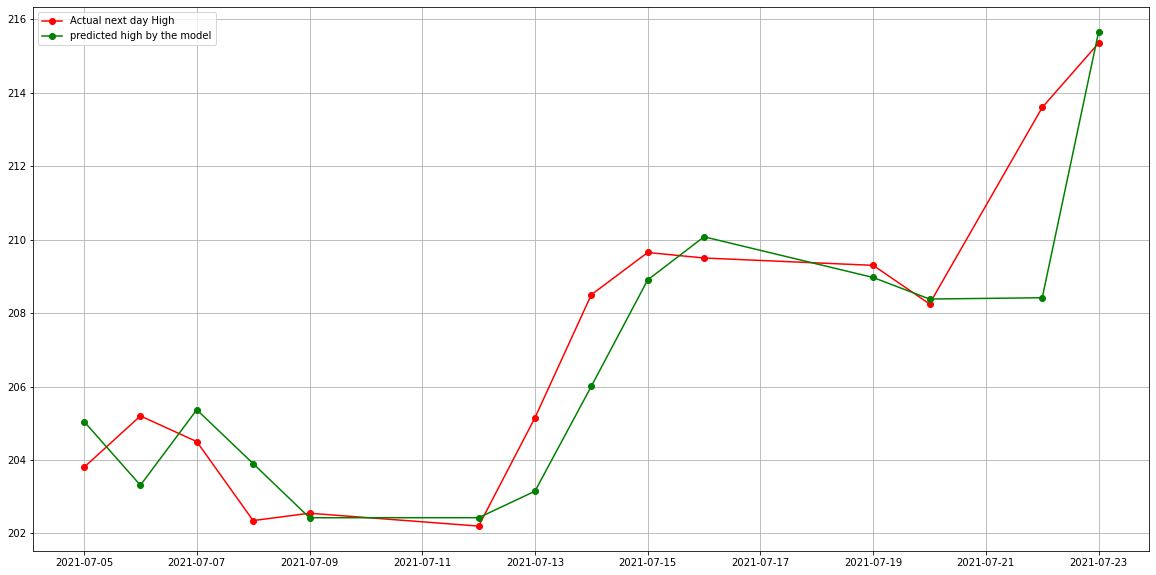

In [42]:
a=[]
i=0
t=test.index.values
for dt in t:
    a.append(dt.strftime("%m/%d/%Y"))
fig, ax = plt.subplots(figsize=(20, 10))
xd = [datetime.datetime.strptime(d,"%m/%d/%Y").date() for d in a]

ax.plot(xd, test['ndhigh'],'-o',label = "Actual next day High", color = 'red')
ax.plot(xd, test['high prediction'],'-o', label = "predicted high by the model", color = 'green')


ax.grid()
plt.legend()
plt.show()